In [146]:
import plotly.express as px
import pandas as pd
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash.dependencies import Input, Output,State
import base64
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [147]:
df = pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [149]:
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [150]:
df["genre"].value_counts().head(10)

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       690
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     359
Stand-Up Comedy              321
Horror Movies                244
Name: genre, dtype: int64

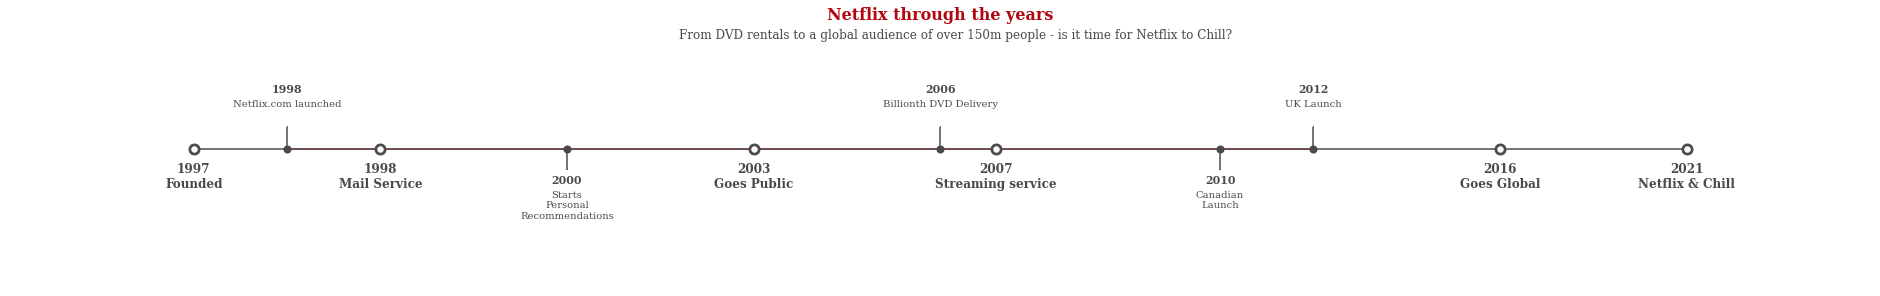

In [151]:
from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(26, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            # color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11
            color='#4a4a4a' , fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' #if idx!=len(tl_sub_x) else '#b20710'
        )



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#b20710')
ax.text(3.6,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')
#2.4,1.57
plt.show()

In [152]:
timeline=fig
timeline.savefig('plot.png')

In [153]:
# making a copy of df
dff = df.copy()
# making 2 df one for tv show and another for movie with rating 
df_tv_show = dff[dff['type']=='TV Show'][['rating', 'type']].rename(columns={'type':'tv_show'})
df_movie = dff[dff['type']=='Movie'][['rating', 'type']].rename(columns={'type':'movie'})
df_tv_show = pd.DataFrame(df_tv_show.rating.value_counts()).reset_index().rename(columns={'index':'tv_show'})
df_tv_show['rating_final'] = df_tv_show['rating'] 
# making rating column value negative
df_tv_show['rating'] *= -1
df_movie = pd.DataFrame(df_movie.rating.value_counts()).reset_index().rename(columns={'index':'movie'})

In [154]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)
# bar plot for tv shows
fig.append_trace(go.Bar(x=df_tv_show.rating, y=df_tv_show.tv_show, orientation='h', showlegend=True, 
                        text=df_tv_show.rating_final, name='TV Show', marker_color='#221f1f'), 1, 1)
# bar plot for movies
fig.append_trace(go.Bar(x=df_movie.rating, y=df_movie.movie, orientation='h', showlegend=True, text=df_movie.rating,
                        name='Movie', marker_color='#b20710'), 1, 2)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(title='Age-Ratings of TV shows and Movies',
                  margin=dict(t=80, b=0, l=70, r=40),
                  hovermode="y unified", 
                  xaxis_title=' ', yaxis_title=" ",
#                   plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color="black", family="Calibri Black"),
                  font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
fig.add_annotation(dict(x=0.81, y=0.6, ax=0, ay=0,
                    xref = "paper", yref = "paper"

                  ))
fig.add_annotation(dict(x=0.2, y=0.2, ax=0, ay=0,
                    xref = "paper", yref = "paper",

                  ))

In [155]:
age_rating=fig
age_rating.update_layout(height=800)

In [156]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year.astype('Int64')
df['month_added'] = df['date_added'].dt.month.astype('Int64')

In [157]:
df['country'] = df['country'].fillna('No data')

countries = []
for i in range(len(df.index)):
    x = df.iloc[i, 5].split(',')
    for j in range(len(x)):
        if x[j].strip() not in countries:
            countries.append(x[j].strip())
        else:
            continue
            
countries.remove('')
countries

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'Turkey',
 'Egypt',
 'India',
 'Poland',
 'Thailand',
 'Nigeria',
 'No data',
 'Norway',
 'Iceland',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Italy',
 'Canada',
 'Indonesia',
 'Romania',
 'Spain',
 'South Africa',
 'France',
 'Portugal',
 'Hong Kong',
 'China',
 'Germany',
 'Argentina',
 'Serbia',
 'Denmark',
 'Kenya',
 'New Zealand',
 'Pakistan',
 'Australia',
 'Taiwan',
 'Netherlands',
 'Philippines',
 'United Arab Emirates',
 'Iran',
 'Belgium',
 'Israel',
 'Uruguay',
 'Bulgaria',
 'Chile',
 'Russia',
 'Mauritius',
 'Lebanon',
 'Colombia',
 'Algeria',
 'Soviet Union',
 'Sweden',
 'Malaysia',
 'Ireland',
 'Luxembourg',
 'Finland',
 'Austria',
 'Peru',
 'Senegal',
 'Switzerland',
 'Ghana',
 'Saudi Arabia',
 'Armenia',
 'Jordan',
 'Mongolia',
 'Namibia',
 'Qatar',
 'Vietnam',
 'Syria',
 'Kuwait',
 'Malta',
 'Czech Republic',
 'Bahamas',
 'Sri Lanka',
 'Cayman Islands',
 'Bangladesh',
 'Zimbabwe',
 'Hungary',
 'Latvia',
 'Liec

In [158]:
for i in range(len(countries)):
    df[countries[i]] = 0
    for j in range(len(df.index)):
        if countries[i] in df.iloc[j, 5]:
            df[countries[i]][j] = 1
            
df.head(3)

C:\PROGRA~1\KMSpico\temp/ipykernel_9880/3770391028.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Slovakia,Lithuania,Afghanistan,Paraguay,Somalia,Sudan,Panama,Uganda,East Germany,Montenegro
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,0,0,0,0,0,0,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,0,0,0,0,0,0,0,0,0,0


In [159]:
USaddM = df.query('`United States` == 1 & type == "Movie"').groupby('year_added').agg({'United States': 'count'})
UKaddM = df.query('`United Kingdom` == 1 & type == "Movie"').groupby('year_added').agg({'United Kingdom': 'count'})
INDaddM = df.query('India == 1 & type == "Movie"').groupby('year_added').agg({'India': 'count'})
CANaddM = df.query('Canada == 1 & type == "Movie"').groupby('year_added').agg({'Canada': 'count'})
FRaddM = df.query('France == 1 & type == "Movie"').groupby('year_added').agg({'France': 'count'})

WaddM = USaddM.join(UKaddM, how = 'outer')\
.join(INDaddM, how = 'outer')\
.join(CANaddM, how = 'outer')\
.join(FRaddM, how = 'outer').fillna(0).reset_index()

In [160]:
USaddS = df.query('`United States` == 1 & type == "TV Show"').groupby('year_added').agg({'United States': 'count'})
UKaddS = df.query('`United Kingdom` == 1 & type == "TV Show"').groupby('year_added').agg({'United Kingdom': 'count'})
JPaddS = df.query('Japan == 1 & type == "TV Show"').groupby('year_added').agg({'Japan': 'count'})
SKaddS = df.query('`South Korea` == 1 & type == "TV Show"').groupby('year_added').agg({'South Korea': 'count'})
CANaddS = df.query('Canada == 1 & type == "TV Show"').groupby('year_added').agg({'Canada': 'count'})

WaddS = USaddS.join(UKaddS, how = 'outer')\
.join(JPaddS, how = 'outer')\
.join(SKaddS, how = 'outer')\
.join(CANaddS, how = 'outer').fillna(0).reset_index()

WaddS.tail(5)

,year_added,United States,United Kingdom,Japan,South Korea,Canada
5,2017,105,52.0,22.0,33.0,17.0
6,2018,152,44.0,33.0,18.0,22.0
7,2019,209,64.0,49.0,50.0,26.0
8,2020,281,64.0,53.0,46.0,36.0
9,2021,18,3.0,1.0,0.0,2.0


In [161]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['United States'],
    mode = 'lines + markers',
    name = 'US',
    marker_color = '#c43131',
))
fig1.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['United Kingdom'],
    mode = 'lines + markers',
    name = 'UK',
    marker_color = '#672669',
))
fig1.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['India'],
    mode = 'lines + markers',
    name = 'India',
    marker_color = '#b8762a',
))
fig1.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['Canada'],
    mode = 'lines + markers',
    name = 'Canada',
    marker_color = '#245c16',
))
fig1.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['France'],
    mode = 'lines + markers',
    name = 'France',
    marker_color = '#147f73',
))

fig1.update_layout(plot_bgcolor = 'white', title = 'Dynamics of adding movies by TOP-5 countries', 
                  title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig1.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)
fig1.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)

# fig1.show()

In [162]:
fig1.update_layout(height=400)

In [163]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['United States'],
    mode = 'lines + markers',
    name = 'US',
    marker_color = '#c43131',
))
fig2.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['United Kingdom'],
    mode = 'lines + markers',
    name = 'UK',
    marker_color = '#672669',
))
fig2.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['Japan'],
    mode = 'lines + markers',
    name = 'Japan',
    marker_color = '#b8762a',
))
fig2.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['South Korea'],
    mode = 'lines + markers',
    name = 'South Korea',
    marker_color = '#245c16',
))
fig2.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['Canada'],
    mode = 'lines + markers',
    name = 'Canada',
    marker_color = '#147f73',
))

fig2.update_layout(plot_bgcolor = 'white', title = 'Dynamics of adding TV shows by TOP-5 countries', 
                  title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig2.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)
fig2.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)

# fig2.show()

In [164]:
fig2.update_layout(height=400)

In [165]:
df = pd.read_csv('netflix_titles.csv')


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [167]:
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [168]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year.astype('Int64')
df['month_added'] = df['date_added'].dt.month.astype('Int64')

In [169]:
df['country'] = df['country'].fillna('No data')

In [170]:

df = df.rename(columns={"country":"mod_country"})
df['mod_country'] = df['mod_country'].apply(lambda x: x.split(",")[0])
df.head(20)

,show_id,type,title,director,cast,mod_country,date_added,release_year,rating,duration,genre,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,International TV Shows,A genetics professor experiments with a treatm...,2017,7
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",2020,6
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,11
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,Horror Movies,"When a doctor goes missing, his psychiatrist w...",2019,4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,Horror Movies,An architect and his wife move into a castle t...,2017,12


In [171]:
con=df['mod_country'].unique()
con=con.tolist()
con.insert(0,'Overall')

In [172]:
app = JupyterDash(external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

image_filename = 'plot.png' 
encoded_image = base64.b64encode(open(image_filename, 'rb').read())  


app.layout = html.Div(children=[

    html.Div([

        #timeline
        html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()))
  

        
    
    ], style={'textAlign': 'center'}),


    html.Div([
        html.Div([

            dcc.Graph(figure=age_rating)
        ],className='six columns'),

        html.Div([

            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ],className='six columns')

        

    ]),
      
    html.Div([


        
        
        html.Div([
            dcc.Graph(
                id='graph_1')
        ],className='nine columns'),

            
        html.Div([

            dcc.Graph(
                id='graph_2')
        ],className='three columns'),    
            
    html.Div([
        html.H4('By Year',style={'font_family':'Calibri Black'}),

         dcc.Slider(id='slider',
                min=2007, #np.min(df['year_added']),
                max=2021, #np.max(df['year_added']),
                marks={
                2007:'Overall',
                2008:'2008',
                2009:'2009',
                2010:'2010',
                2011:'2011',
                2012:'2012',
                2013:'2013',
                2014:'2014',
                2015:'2015',
                2016:'2016',
                2017:'2017',
                2018:'2018',
                2019:'2019',
                2020:'2020',
                2021:'2021'},
                value=2007,#np.min(df['year_added']),
                step=None)

    ]),


        html.Div([
            html.H4('by Country',style={'font_family':'Calibri Black'}),

              dcc.Dropdown(
            id='dropdown',
            options=[

                {'label':  i , 'value': i} for i in con 

            ],
            multi=False,    
            value='Overall',
            ) 

        ])        
             
     
    ])    
    
])

@app.callback(
    Output(component_id="graph_1",component_property= "figure"),
    Output(component_id="graph_2",component_property= "figure"),
    Input(component_id="slider", component_property="value"),
    #State(component_id="slider", component_property="value"),
    Input(component_id="dropdown", component_property="value")
)

def call_back_fn1(year,country):
    
    


    if year < 2008:
        if country=='Overall':
            df_sliced=df
        else:
            df_sliced = df[df.mod_country == country]
            
            
        
    else:
        if country =='Overall':
            df_sliced = df[df.year_added == year]
        else:
            df_sliced = df[(df.year_added == year) & (df.mod_country==country)]
        
    fig_1 = px.histogram(df_sliced.genre,color=df_sliced.genre,color_discrete_sequence=px.colors.diverging.RdGy,title='Counts of Genres')
    fig_1.update_layout(title_font_family='Calibri Black')


    fig_2 = px.pie(df_sliced,names='type',color_discrete_sequence=['#b20710','#221f1f'])
    fig_2.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict( line = dict(color = 'white', width = 2)))

    fig_2.update_layout(annotations = [dict(text = 'Distribution of <br> TV shows and <br> movies', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')],
                  showlegend = False)
                  

    return fig_1,fig_2

app.run_server(debug=False)

C:\Users\Khalid Sobh\anaconda3\lib\site-packages\jupyter_dash\jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Dash app running on http://127.0.0.1:8050/
